# Tabular methods

## Sarsa-lambda comparison

In [1]:
%matplotlib inline

import gym
import numpy as np
import matplotlib.pyplot as plt

from math_utils import constant, clipped_exp_decay, clipped_harmonic_sequence, epsilon_greedy
from tabular import train, sarsa, sarsa_lambda


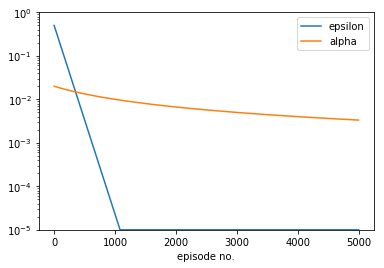

In [2]:
env = gym.make('CliffWalking-v0')

state_size = env.observation_space.n
action_size = env.action_space.n

max_eps = int(5e3)
alpha = clipped_harmonic_sequence(2e-2, 1e-3, 1e-5)
epsilon = clipped_exp_decay(0.5, 0.01, 1e-5)
gamma = 1.0
policy = epsilon_greedy(action_size, epsilon)

sarsa_episode_fn = sarsa(policy, gamma, alpha)

lambda_ = 0.5
sarsa_lambda_episode_fn = sarsa_lambda(policy, gamma, alpha, lambda_)

# Optimistic initialisation
Q_initial = 0.0 * np.ones((state_size, action_size), np.float64)

x = np.arange(max_eps)
plt.yscale('log')
plt.ylim([1e-5, 1])
plt.xlabel('episode no.')
plt.plot(x, np.vectorize(epsilon)(x), label='epsilon')
plt.plot(x, np.vectorize(alpha)(x), label='alpha')
plt.legend();

In [3]:
def moving_avg(window, x):
    avg_x = np.arange(x.shape[0] - window + 1) + window - 1
    avg = np.convolve(x, np.ones(window)/ window, mode='valid')
    return avg_x, avg

In [4]:
moving_average = 100

def train_with_plot(env, episode_fn, moving_average):
    def stop(returns, i, Q):
        return i == max_eps

    def log(returns, i, Q):
        avg = sum(returns[-moving_average:]) / moving_average
        print(f'\r{i:5d}: {avg}', end='')

    returns, tracks = train(env, episode_fn, stop, log, moving_average, Q_initial)
    returns = np.array(returns)
    tracks = np.array(tracks)
    
    fig = plt.figure()
    plt.ylim([-250, 0])
    plt.xlabel('episode no.')
    plt.ylabel('return')
    plt.plot(returns, 'b.', label='return')
    avg_x, avg = moving_avg(moving_average, returns)
    plt.plot(avg_x, avg, 'r-', label=f'{moving_average}-long moving average')
    plt.legend()
    fig = plt.figure()
    plt.plot(np.max(tracks, axis=2))
    plt.xlabel('episode no.')
    plt.ylabel('state value')
    return returns, tracks

 5000: -13.081

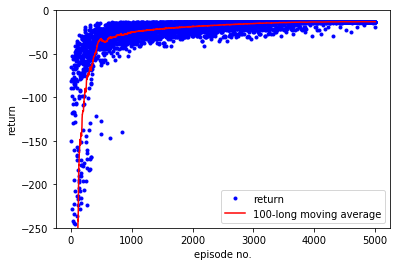

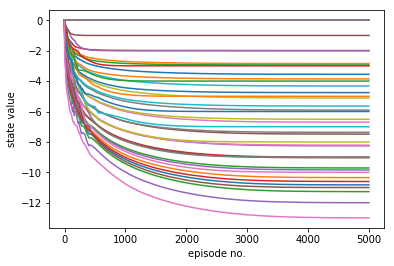

In [5]:
sarsa_returns, sarsa_tracks = train_with_plot(env, sarsa_episode_fn, moving_average)

 5000: -13.043

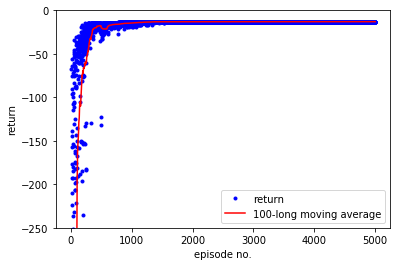

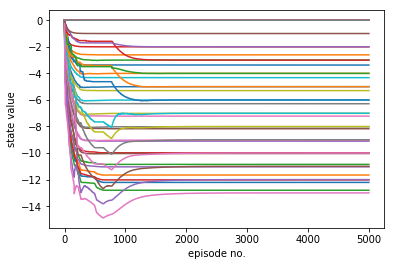

In [6]:
sarsa_lambda_returns, sarsa_lambda_tracks = train_with_plot(env, sarsa_lambda_episode_fn, moving_average)

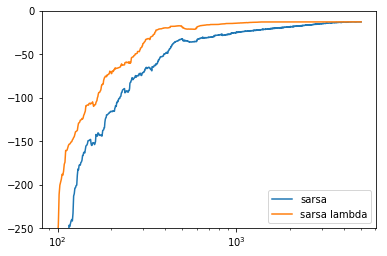

In [7]:
avg1_x, avg1 = moving_avg(100, sarsa_returns)
avg2_x, avg2 = moving_avg(100, sarsa_lambda_returns)

plt.figure()
plt.xscale('log')
plt.ylim([-250, 0])
plt.plot(avg1_x, avg1, label='sarsa')
plt.plot(avg2_x, avg2, label='sarsa lambda')
plt.legend()
